In [1]:
import numpy as np
import pandas as pd

In [2]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])

In [3]:
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [4]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])

In [6]:
string_data

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [7]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

## Filtering Out Missing Data

In [8]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])

In [9]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [10]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [11]:
 data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                       [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [12]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [14]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [16]:
data.dropna(axis=0)

,0,1,2
0,1.0,6.5,3.0


## Filling In Missing Data

In [20]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

In [21]:
df

,0,1,2
0,-2.611361,NaN,NaN
1,0.171015,NaN,NaN
2,0.475921,NaN,0.989589
3,0.554072,NaN,0.537221
4,-0.083030,-1.674509,-1.722404
5,-0.628079,0.668576,1.557162
6,-0.866820,1.759990,-1.408696


In [22]:
df.fillna(0)

,0,1,2
0,-2.611361,0.000000,0.000000
1,0.171015,0.000000,0.000000
2,0.475921,0.000000,0.989589
3,0.554072,0.000000,0.537221
4,-0.083030,-1.674509,-1.722404
5,-0.628079,0.668576,1.557162
6,-0.866820,1.759990,-1.408696


Calling fillna with a dictionary, you can use a different fill value for each column:

In [23]:
df.fillna({1: 1.2, 2:0.2})

,0,1,2
0,-2.611361,1.200000,0.200000
1,0.171015,1.200000,0.200000
2,0.475921,1.200000,0.989589
3,0.554072,1.200000,0.537221
4,-0.083030,-1.674509,-1.722404
5,-0.628079,0.668576,1.557162
6,-0.866820,1.759990,-1.408696


In [24]:
df = pd.DataFrame(np.random.standard_normal((6,3)))
df.iloc[2:,1] = np.nan
df.iloc[4:, 2] = np.nan

In [25]:
df

,0,1,2
0,0.250239,-0.827191,1.684347
1,1.041742,-1.344207,0.816240
2,-1.661333,NaN,0.882972
3,-0.432008,NaN,2.405352
4,1.190314,NaN,NaN
5,0.297031,NaN,NaN


In [30]:
df.ffill()

,0,1,2
0,0.250239,-0.827191,1.684347
1,1.041742,-1.344207,0.816240
2,-1.661333,-1.344207,0.882972
3,-0.432008,-1.344207,2.405352
4,1.190314,-1.344207,2.405352
5,0.297031,-1.344207,2.405352


In [31]:
df.ffill(limit=3)

,0,1,2
0,0.250239,-0.827191,1.684347
1,1.041742,-1.344207,0.816240
2,-1.661333,-1.344207,0.882972
3,-0.432008,-1.344207,2.405352
4,1.190314,-1.344207,2.405352
5,0.297031,NaN,2.405352


In [32]:
df.fillna(df.mean())

,0,1,2
0,0.250239,-0.827191,1.684347
1,1.041742,-1.344207,0.816240
2,-1.661333,-1.085699,0.882972
3,-0.432008,-1.085699,2.405352
4,1.190314,-1.085699,1.447228
5,0.297031,-1.085699,1.447228


# Data Transformation

## Removing Duplicates

In [33]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                "k2": [1, 1, 2, 3, 3, 4, 4]})

In [34]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [35]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [36]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [37]:
data['v1'] = range(7)

In [38]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [39]:
data.drop_duplicates(subset=['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


## Transforming Data Using a Function or Mapping

In [40]:
 data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",                             
"pastrami", "corned beef", "bacon",   
"pastrami", "honey ham", "nova lox"],
 "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [41]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [42]:
 meat_to_animal = {
 "bacon": "pig",
 "pulled pork": "pig",
 "pastrami": "cow",
 "corned beef": "cow",
 "honey ham": "pig",
 "nova lox": "salmon"
 }

In [43]:
data['animal'] = data['food'].map(meat_to_animal)

In [44]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [45]:
def get_animal(x):
    return meat_to_animal[x]
data['food'].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

##  Replacing Values

In [2]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [3]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [4]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

## Renaming Axis Indexes

In [3]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),                   
index=["Ohio", "Colorado", "New York"],                     
columns=["one", "two", "three", "four"])

In [4]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


 Like a Series, the axis indexes have a map method:

In [6]:
def transform(x):
    return x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

You can assign to the index attribute, modifying the DataFrame in place

In [7]:
data.index = data.index.map(transform)

In [9]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### DataFrame.rename Method in Pandas

The `.rename()` method in pandas is used to alter labels of rows and columns in a DataFrame. This method is quite versatile, allowing you to rename specific rows and columns by providing a mapping dictionary or by using functions.

#### Syntax

```python
DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')
```

#### Parameters

- **mapper**: Dict-like or function transformations to apply to that axis' values.
- **index**: Alternative to specifying axis (mapper, axis=0 is equivalent to index=mapper).
- **columns**: Alternative to specifying axis (mapper, axis=1 is equivalent to columns=mapper).
- **axis**: {0 or ‘index’, 1 or ‘columns’}, default 0. The axis to rename.
- **copy**: Also copy underlying data.
- **inplace**: Whether to return a new DataFrame or modify the existing one.
- **level**: In case of a MultiIndex, only rename labels in the specified level.
- **errors**: {‘ignore’, ‘raise’}, default ‘ignore’. If ‘raise’, will raise a KeyError when a label not found in the selected axis. If ‘ignore’, suppress the error and existing labels are left unmodified.

In [10]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [13]:
data.rename(index={'OHIO' : 'Indiana'},
           columns = {'three': 'peekabo'})

,one,two,peekabo,four
Indiana,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretization and Binning

### pandas.cut Method

The `pandas.cut()` method is used to segment and sort data values into bins or intervals. This function is useful for converting continuous data into categorical data.

##### Syntax

```python
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
```

##### Parameters

- **x**: Array-like, the data to be binned.
- **bins**: int, sequence of scalars, or IntervalIndex. The criteria to bin by.
- **right**: bool, default True. Indicates whether bins include the rightmost edge.
- **labels**: array or bool, default None. Used as labels for the bins.
- **retbins**: bool, default False. Whether to return the bins.
- **precision**: int, default 3. Precision at which to store and display the bins labels.
- **include_lowest**: bool, default False. Whether the first interval should be left-inclusive.
- **duplicates**: {‘raise’, ‘drop’}, default ‘raise’. How to handle bin edge duplicates.

##### Example

```python
import pandas as pd

# Sample data
data = [1, 7, 5, 4, 6, 3, 8, 10, 2, 9]

# Binning the data into 4 bins
binned_data = pd.cut(data, bins=4)

print(binned_data)
```

In [14]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)

In [15]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [16]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [17]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [21]:
age_categories.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

In [22]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

<Axes: >

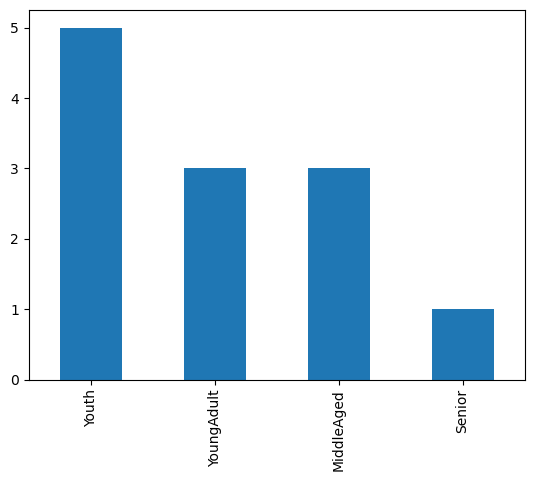

In [24]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
grouped_age = pd.cut(ages, bins, labels=group_names)
g = grouped_age.value_counts()
g.plot(kind='bar')

 If you pass an integer number of bins to pandas.cut instead of explicit bin edges, it
 will compute equal-length bins based on the minimum and maximum values in the
 data

In [25]:
data = np.random.uniform(size=20)
data

array([0.08421993, 0.95451182, 0.17641179, 0.21554202, 0.9798202 ,
       0.30644919, 0.10805084, 0.13210052, 0.88755528, 0.81321217,
       0.24230255, 0.95245434, 0.67592945, 0.84050977, 0.77691114,
       0.66269396, 0.78370767, 0.17014412, 0.89630462, 0.6416374 ])

In [28]:
test = pd.cut(data, 4, precision=2) #The precision=2 option limits the decimal precision to two digits

In [29]:
test.value_counts()

(0.083, 0.31]    8
(0.31, 0.53]     0
(0.53, 0.76]     3
(0.76, 0.98]     9
Name: count, dtype: int64

 Since pandas.qcut uses sample
 quantiles instead, you will obtain roughly equally sized bins:

In [32]:
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)
quartiles.value_counts()

(-3.44, -0.61]    250
(-0.61, 0.044]    250
(0.044, 0.77]     250
(0.77, 2.88]      250
Name: count, dtype: int64

##  Detecting and Filtering Outliers

In [35]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.017984,0.037046,-0.054329,0.005572
std,1.010117,0.999355,0.980815,0.971402
min,-3.237722,-2.980321,-3.186758,-3.047962
25%,-0.687062,-0.624907,-0.697279,-0.696667
50%,0.014645,0.045252,-0.043830,-0.004141
75%,0.625294,0.682050,0.573937,0.710703
max,3.168260,3.244595,3.345586,3.162711


In [36]:
col = data[2]
col[col.abs() > 3]

642   -3.143714
923   -3.186758
943    3.345586
Name: 2, dtype: float64

In [37]:
data[(data.abs() > 3).any(axis=1)]

,0,1,2,3
106,1.478999,-1.309272,1.891113,-3.047962
167,0.579035,3.244595,-1.319568,-0.140734
171,3.032939,0.944247,-1.665467,0.365613
218,3.168260,0.804458,0.526933,-0.425355
420,2.093454,-1.592507,-1.616194,3.162711
439,-3.053645,-0.346942,0.095823,-0.303481
642,0.585196,0.341480,-3.143714,1.254174
707,-1.560698,-2.287071,-0.011878,3.087299
741,-3.237722,-1.948078,-0.397641,0.330327
805,3.075040,-0.076748,-0.443124,-0.415207


##  Permutation and Random Sampling

In [38]:
df = pd.DataFrame(np.arange(5*7).reshape((5,7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [41]:
sampler = np.random.permutation(5)
sampler

array([4, 0, 2, 1, 3])

That array can then be used in iloc-based indexing or the equivalent take function

In [42]:
df.take(sampler)

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27


In [43]:
df.iloc[sampler]

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27


By invoking take with axis="columns", we could also select a permutation of the
 columns:

In [44]:
column_sampler = np.random.permutation(7)
column_sampler

array([2, 3, 6, 0, 1, 4, 5])

In [45]:
df.take(column_sampler, axis=1)

,2,3,6,0,1,4,5
0,2,3,6,0,1,4,5
1,9,10,13,7,8,11,12
2,16,17,20,14,15,18,19
3,23,24,27,21,22,25,26
4,30,31,34,28,29,32,33


In [46]:
df.sample(3)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27


## Computing Indicator/Dummy Variables

In [48]:
 df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],                   
"data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [57]:
df_dummies = pd.get_dummies(df['key'])
df_dummies.astype(int)

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [63]:
dummies = pd.get_dummies(df['key'], prefix = 'key').astype(int)
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [65]:
mnames = ["movie_id", "title", "genres"]

In [66]:
 movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
 header=None, names=mnames, engine="python")

In [75]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


pandas has implemented a special Series method str.get_dummies (methods that
 start with str.

In [69]:
dummies = movies["genres"].str.get_dummies("|")

In [77]:
movies["genres"].value_counts()

genres
Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: count, Length: 301, dtype: int64

In [70]:
dummies.iloc[:10, :6]

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [78]:
 movies_windic = movies.join(dummies.add_prefix("Genre_"))

In [80]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [84]:
np.random.seed(12345)
values = np.random.uniform(size=10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [85]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [87]:
pd.get_dummies(pd.cut(values, bins)).astype(int)

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0
